# Assignment 2

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./05_src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [369]:
%load_ext dotenv
%dotenv 


The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [370]:
# Load the libraries as required.
from pathlib import Path
import pandas as pd




In [371]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [372]:
fires_dt.keys()

Index(['coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi',
       'temp', 'rh', 'wind', 'rain', 'area'],
      dtype='object')

In [376]:
fires_dt.head()

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [377]:
fires_dt.describe(include='all')

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


# Get X and Y

Create the features data frame and target data.

In [378]:
dt = fires_dt
X = dt.drop(columns=['area'])
Y = 1*(dt[['area']] >= 7).values.ravel()


In [380]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB


In [381]:
 1*(dt[['area']] >= 7).values.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [382]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features


Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')

In [383]:
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns
categorical_features

Index(['month', 'day'], dtype='object')

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [384]:
# Create a StandardScaler object
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# Select only numeric features for scaling
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
X_num = X[numeric_features]

# Fit the StandardScaler object with the returns data
std_scaler.fit(X_num)

,copy,True
,with_mean,True
,with_std,True


In [385]:
X_num.mean()

coord_x      4.669246
coord_y      4.299807
ffmc        90.644681
dmc        110.872340
dc         547.940039
isi          9.021663
temp        18.889168
rh          44.288201
wind         4.017602
rain         0.021663
dtype: float64

In [386]:
# Transform the returns data using the fitted scaler

scaled_X = std_scaler.transform(X_num)
scaled_X_df = pd.DataFrame(scaled_X, columns=X_num.columns)

In [387]:
scaled_X_df.mean()

coord_x    2.113074e-16
coord_y    2.611279e-16
ffmc      -1.752306e-15
dmc       -2.748715e-17
dc         6.871787e-17
isi        1.030768e-17
temp       2.542561e-16
rh         2.198972e-16
wind      -4.191790e-16
rain      -6.871787e-18
dtype: float64

In [388]:
X_num.std()

coord_x      2.313778
coord_y      1.229900
ffmc         5.520111
dmc         64.046482
dc         248.066192
isi          4.559477
temp         5.806625
rh          16.317469
wind         1.791653
rain         0.295959
dtype: float64

In [389]:
scaled_X_df.std()

coord_x    1.000969
coord_y    1.000969
ffmc       1.000969
dmc        1.000969
dc         1.000969
isi        1.000969
temp       1.000969
rh         1.000969
wind       1.000969
rain       1.000969
dtype: float64

<Axes: xlabel='month'>

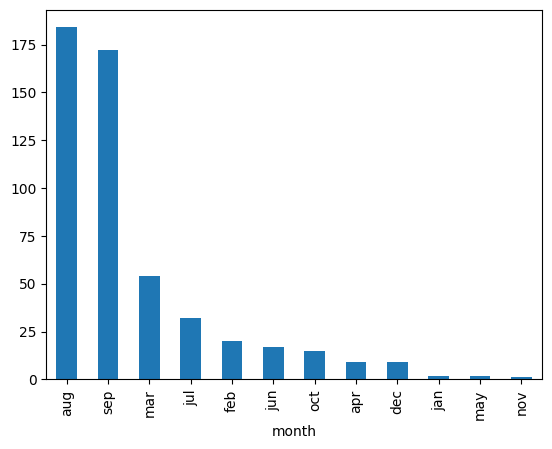

In [390]:
# one hot encoder
X['month'].value_counts().plot(kind = 'bar')

In [391]:
X['month']

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [392]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(drop='if_binary')
onehot.fit(X[['month']])

,categories,'auto'
,drop,'if_binary'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [393]:
listing_enc = onehot.transform(X[['month']])
listing_enc.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(517, 12))

<Axes: xlabel='day'>

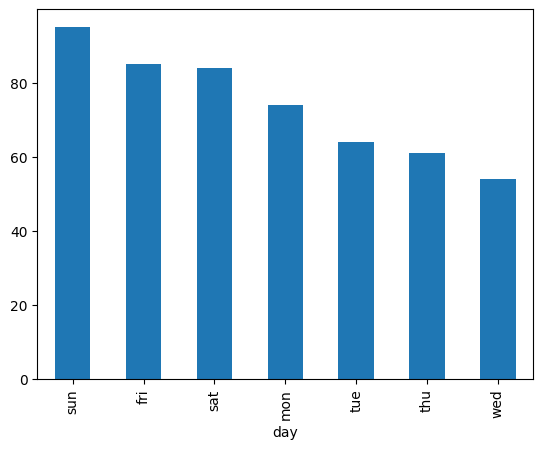

In [394]:
# one hot encoder for day
X['day'].value_counts().plot(kind = 'bar')

In [395]:
X['day']

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [396]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(drop='if_binary')
onehot.fit(X[['day']])

,categories,'auto'
,drop,'if_binary'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [397]:
listing_enc = onehot.transform(X[['day']])
listing_enc.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(517, 7))

In [407]:
# Preproc1
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

num_cols = numeric_features
pipe_num_simple = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('standardizer', StandardScaler())
])


cat_pipeline = Pipeline([
    ("one", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

Preproc1 = ColumnTransformer(
    [
        ("numeric_simple", pipe_num_simple, num_cols),
        ("cat_vars", cat_pipeline, ["month", "day"]),
    ],
    remainder="drop"
)

pipe_simple = Pipeline([
    ('preprocess', Preproc1),
    ('model', Lasso())
])
pipe_simple


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_simple', ...), ('cat_vars', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [345]:
numeric_features

Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')

In [408]:
# Preproc2
num_cols = numeric_features


num_cols_transform = ['temp', 'wind', 'ffmc',]

pipe_num_simple = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('standardizer', StandardScaler())
])

pipe_num_yj = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('standardizer', StandardScaler()),
    ('transform', PowerTransformer(method='yeo-johnson'))
])

Preproc2 = ColumnTransformer([
    ('numeric_std', pipe_num_simple, num_cols),
    ('numeric_yj', pipe_num_yj, num_cols_transform), 
    ('cat_vars', OneHotEncoder(handle_unknown="ignore", drop="first"), ['day','month'])
], 
 remainder='drop')



pipe_yj = Pipeline([
    ('preprocess', Preproc2),
    ('clf', Lasso())
])
pipe_yj

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_std', ...), ('numeric_yj', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [410]:
# Pipeline A = preproc1 + baseline
Pipeline_A = pipe_simple = Pipeline([
    ('preprocessing',Preproc1 ),
    ('regressor',KNeighborsRegressor())
])
Pipeline_A

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_simple', ...), ('cat_vars', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [411]:
# Pipeline B = preproc2 + baseline
Pipeline_B  = Pipeline([
    ('preprocessing',Preproc2 ),
    ('regressor',KNeighborsRegressor())
])
Pipeline_B


,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_std', ...), ('numeric_yj', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [412]:
# Pipeline C = preproc1 + advanced model
Pipeline_C  = Pipeline([
    ('preprocessing',Preproc1 ),
    ('regressor',RandomForestRegressor(random_state=42))
])
Pipeline_C

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_simple', ...), ('cat_vars', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [413]:
# Pipeline D = preproc2 + advanced model

Pipeline_D  = Pipeline([
    ('preprocessing',Preproc2 ),
    ('regressor',RandomForestRegressor(random_state=42))
])
Pipeline_D



,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_std', ...), ('numeric_yj', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [415]:
# setting the spliting strategy
X = dt.drop(columns = 'area')
Y = dt['area']

scoring = [ "neg_root_mean_squared_error", "r2"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [416]:
#pipeline parameters
Pipeline_A .get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric_simple',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardizer',
                                                     StandardScaler())]),
                                    Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
          'rain'],
         dtype='object')),
                                   ('cat_vars',
                                    Pipeline(steps=[('one',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore'))]),
                                    ['month', 'day'])])),
  ('regressor', KNeighborsRegressor())],
 'transform_input': None,
 'verbose': False,
 'preprocessing

In [417]:
param_grid_A = {
    "regressor__n_neighbors": [3, 4, 5, 10],
    "regressor__weights": ['uniform', 'distant']
    
   
}


In [418]:
#Gridsearch
grid_Search_A = GridSearchCV(
    estimator=Pipeline_A, 
    param_grid=param_grid_A, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error" )

grid_Search_A.fit(X_train, Y_train)

c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-p

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'regressor__n_neighbors': [3, 4, ...], 'regressor__weights': ['uniform', 'distant']}"
,scoring,"['neg_root_mean_squared_error', 'r2']"
,n_jobs,None
,refit,'neg_root_mean_squared_error'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numeric_simple', ...), ('cat_vars', ...)]"


In [419]:
best_params_A = grid_Search_A.best_params_


grid_Search_A.best_params_, grid_Search_A.best_score_

({'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'},
 np.float64(-40.67317037343366))

In [420]:
#pipeline parameters
Pipeline_B .get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric_std',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardizer',
                                                     StandardScaler())]),
                                    Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
          'rain'],
         dtype='object')),
                                   ('numeric_yj',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardizer',
                                                     StandardScaler()),
                                                    ('transform',
                                      

In [427]:
param_grid_B = {
    "regressor__n_neighbors": [3, 5, 7, 9],
    "regressor__weights": ["uniforme", "distance"]
    
    }

In [428]:
#Gridsearch
grid_Search_B = GridSearchCV(
    estimator=Pipeline_B, 
    param_grid=param_grid_B, 
    scoring = scoring, 
    cv = 5,
    refit =  "neg_root_mean_squared_error")

grid_Search_B.fit(X_train, Y_train)

c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-p

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'regressor__n_neighbors': [3, 5, ...], 'regressor__weights': ['uniforme', 'distance']}"
,scoring,"['neg_root_mean_squared_error', 'r2']"
,n_jobs,None
,refit,'neg_root_mean_squared_error'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numeric_std', ...), ('numeric_yj', ...), ...]"


In [430]:
#pipeline parameters
Pipeline_C .get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric_simple',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardizer',
                                                     StandardScaler())]),
                                    Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
          'rain'],
         dtype='object')),
                                   ('cat_vars',
                                    Pipeline(steps=[('one',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore'))]),
                                    ['month', 'day'])])),
  ('regressor', RandomForestRegressor(random_state=42))],
 'transform_input': None,
 'verbose': False

In [431]:
param_grid_C = {
    "regressor__max_depth": [None, 20],
    "regressor__min_samples_leaf": [1, 4, 7, 10]
    
}

In [433]:
#Gridsearch#
grid_Search_C = GridSearchCV(
    estimator=Pipeline_C, 
    param_grid=param_grid_C, 
    scoring = scoring, 
    cv = 5,
    refit =  "neg_root_mean_squared_error")

grid_Search_C.fit(X_train, Y_train)

c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-p

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__max_depth': [None, 20], 'regressor__min_samples_leaf': [1, 4, ...]}"
,scoring,"['neg_root_mean_squared_error', 'r2']"
,n_jobs,None
,refit,'neg_root_mean_squared_error'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numeric_simple', ...), ('cat_vars', ...)]"


In [434]:
#pipeline parameters
Pipeline_D .get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric_std',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardizer',
                                                     StandardScaler())]),
                                    Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
          'rain'],
         dtype='object')),
                                   ('numeric_yj',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardizer',
                                                     StandardScaler()),
                                                    ('transform',
                                      

In [435]:
param_grid_D = {
    "regressor__max_depth": [None, 20],
    "regressor__min_samples_leaf": [1, 4, 7, 10]
    }

In [436]:
grid_Search_D = GridSearchCV(
    estimator=Pipeline_D, 
    param_grid=param_grid_D, 
    scoring = scoring, 
    cv = 5,
    refit =  "neg_root_mean_squared_error")

grid_Search_D.fit(X_train, Y_train)

c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ecce H\Dir5\production\.venv\Lib\site-p

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__max_depth': [None, 20], 'regressor__min_samples_leaf': [1, 4, ...]}"
,scoring,"['neg_root_mean_squared_error', 'r2']"
,n_jobs,None
,refit,'neg_root_mean_squared_error'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numeric_std', ...), ('numeric_yj', ...), ...]"


# Evaluate

+ Which model has the best performance?

In [437]:
best_params_A = grid_Search_A.best_params_


grid_Search_A.best_params_, grid_Search_A.best_score_

({'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'},
 np.float64(-40.67317037343366))

In [438]:
best_params_B = grid_Search_B.best_params_


grid_Search_B.best_params_, grid_Search_B.best_score_

({'regressor__n_neighbors': 9, 'regressor__weights': 'distance'},
 np.float64(-42.35634209718443))

In [439]:
best_params_C = grid_Search_C.best_params_


grid_Search_C.best_params_, grid_Search_C.best_score_

({'regressor__max_depth': None, 'regressor__min_samples_leaf': 10},
 np.float64(-40.1413198728053))

In [440]:
best_params_D = grid_Search_D.best_params_


grid_Search_D.best_params_, grid_Search_D.best_score_

({'regressor__max_depth': None, 'regressor__min_samples_leaf': 10},
 np.float64(-40.1066111880891))

The model D has the best performance as it has the lowest prediction error (- 40.106).

In [449]:
Best_model_D = grid_Search_D.best_estimator_
Best_model_D

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_std', ...), ('numeric_yj', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Export

+ Save the best performing model to a pickle file.

In [444]:
import pickle
import os

os.makedirs("./models", exist_ok=True)
with open('./models/Best_model_D.pkl', 'wb') as f:
    pickle.dump(grid_Search_D.best_estimator_, f)

In [446]:
with open("models/Best_model_D.pkl", 'rb') as f:
    Best_model_D = pickle.load(f)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [451]:
Best_model_D.named_steps['regressor']

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [453]:
import shap
import numpy as np


In [455]:
# Get the preprocessed data (numeric + one-hot encoded)
X_preprocessed = Best_model_D.named_steps['preprocessing'].transform(X_test)


In [ ]:
# Numeric feature names
numeric_features = Best_model_D.named_steps['preprocessing'].transformers_[0][2]

# Categorical feature names after one-hot encoding
categorical_pipeline = Best_model_D.named_steps['preprocessing'].transformers_[1][1]
categorical_columns = Best_model_D.named_steps['preprocessing'].transformers_[1][2]
cat_features = 'cat_vars'

# Combine all
feature_names = list(numeric_features) + list(cat_features)

In [484]:
feature_names

['coord_x',
 'coord_y',
 'ffmc',
 'dmc',
 'dc',
 'isi',
 'temp',
 'rh',
 'wind',
 'rain',
 'temp',
 'wind',
 'ffmc']

In [481]:
categorical_columns

['temp', 'wind', 'ffmc']

C:\Users\Ecce H\AppData\Local\Temp\ipykernel_18400\1800837113.py:35: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_preprocessed, feature_names=feature_names)


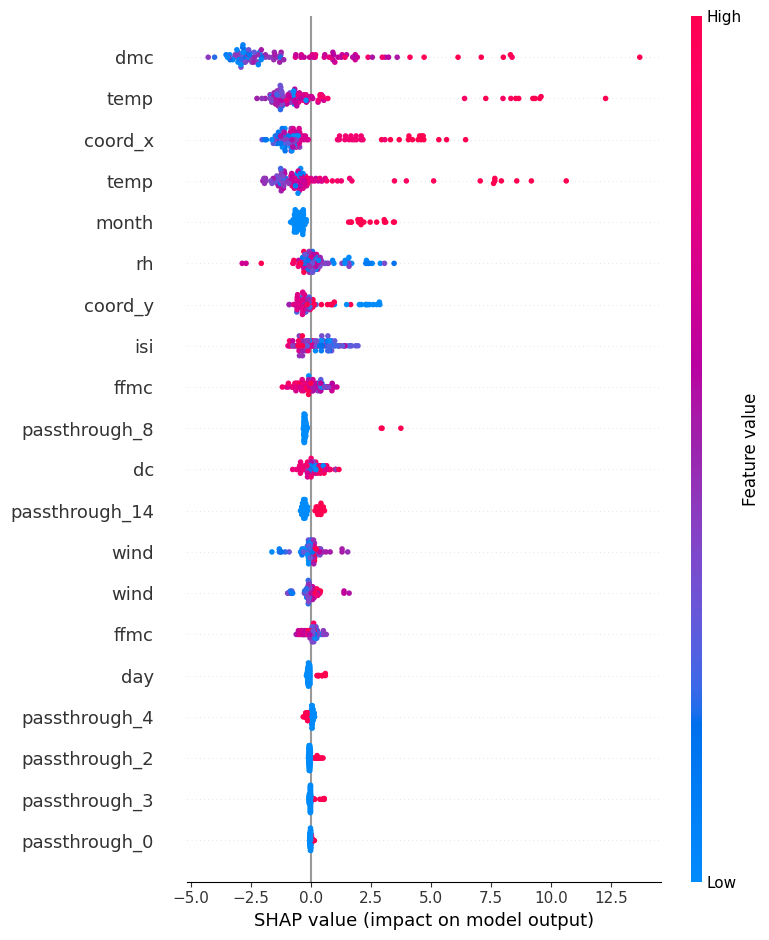

In [ ]:
import shap


# 1 Preprocessed data
X_preprocessed = Best_model_D.named_steps['preprocessing'].transform(X_test)

# 2 Feature names
preprocessor = Best_model_D.named_steps['preprocessing']

feature_names = []

for name, transformer, columns in preprocessor.transformers_:
    if transformer == 'drop':
        continue
    if hasattr(transformer, 'named_steps'):  # pipeline
        # Try to find OneHotEncoder
        ohe = [step for step in transformer.named_steps.values() if "OneHotEncoder" in str(type(step))]
        if ohe:  # found OHE
            feature_names.extend(ohe[0].get_feature_names_out(columns))
        else:  # numeric pipeline
            feature_names.extend(columns)
    else:  # direct transformer
        feature_names.extend(columns)

# If the preprocessed array has extra columns due to remainder='passthrough', add generic names
if X_preprocessed.shape[1] > len(feature_names):
    n_extra = X_preprocessed.shape[1] - len(feature_names)
    feature_names.extend([f'passthrough_{i}' for i in range(n_extra)])

# 3 SHAP explainer
explainer = shap.TreeExplainer(Best_model_D.named_steps['regressor'])
shap_values = explainer.shap_values(X_preprocessed)

# 4 Plot summary
shap.summary_plot(shap_values, X_preprocessed, feature_names=feature_names)


*- From the plot of the SHAP value, we can say that the features that are important in the prediction are: DMC(DMC index from the FWI system), temp (temperature in Celcius degrees), coord_x(x-axis spatial coodinae within the Montesinho park map) and month(month of the year) as they have high feauture value.
*- The feauture day(day of the week), ffmc(FFMC index from the FWI index) can be taken out from the moel as they have low value.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at the `help` channel. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.